In [1]:
import requests
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from collections import defaultdict


In [2]:
res = requests.get("https://draft.premierleague.com/api/league/83867/details")
data = res.json()

In [3]:
matches = data["matches"]
league_entries = data["league_entries"]

In [4]:

columns = []
for items in league_entries:
    # print(items)
    columns.append(items["id"])
print(columns)
row = [x + 1 for x in range(38)]

[355184, 355430, 355507, 357575, 357580, 357852, 359054, 379767, 379785, 383101, 383374, 386207, 387281, 387336, 387405, 387791]


In [5]:
df = pd.DataFrame(data, columns=columns, index=row)
# df

In [6]:
entry_names = {}
for items in league_entries:
    entry_id = items["id"]
    entry_name = items["entry_name"]
    entry_names[entry_id] = entry_name

new_columns = [entry_names[x] for x in columns]
new_df = pd.DataFrame(data, columns=new_columns, index=row)
for match in matches:
    event = match["event"]
    league_entry_1 = match["league_entry_1"]
    league_entry_1_points = match["league_entry_1_points"]
    league_entry_2 = match["league_entry_2"]
    league_entry_2_points = match["league_entry_2_points"]

    new_df.at[event, entry_names[league_entry_1]] = league_entry_1_points
    new_df.at[event, entry_names[league_entry_2]] = league_entry_2_points
new_df

,Ayew talkin to me,Ballotelli-tubbies,GIVE SPEED JERSEY,soccer!!,balling?,Obi Wan Iwobi,GueyePride🇸🇳,fake bpl fan,Texback Wet,Kickinyourballs,CHANGE NAME,F1 2012,SIUUUUUUCK my balls,Finding Neto,Steelers,WolfHam Wonders
1,45,38,31,42,35,31,34,33,26,33,22,32,27,42,37,25
2,38,41,28,33,31,31,8,42,29,32,28,39,44,50,29,45
3,34,39,32,25,32,53,31,27,43,42,46,27,32,23,49,22
4,47,34,42,30,50,36,21,31,26,22,40,32,35,30,43,43
5,45,41,34,20,33,41,41,28,24,26,20,33,30,26,38,31
6,34,35,33,40,34,31,38,25,39,27,36,18,33,31,43,50
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,30,15,31,22,40,37,16,18,13,15,49,22,31,21,13,26
9,34,41,50,30,39,26,15,29,29,32,35,26,43,23,56,30
10,46,42,36,38,50,28,31,23,33,33,37,16,35,35,37,21


In [7]:
points_df = new_df.copy()
points_df = new_df.astype(float)

for match in matches:
    event = match["event"]
    if match["finished"] == False:
        league_entry_1 = entry_names[match["league_entry_1"]]
        league_entry_2 = entry_names[match["league_entry_2"]]
        points_df.at[event, league_entry_1] = np.nan
        points_df.at[event, league_entry_2] = np.nan
        continue
    league_entry_1 = entry_names[match["league_entry_1"]]
    league_entry_1_points = match["league_entry_1_points"]
    league_entry_2 = entry_names[match["league_entry_2"]]
    league_entry_2_points = match["league_entry_2_points"]
    
    if league_entry_1_points > league_entry_2_points:
        points_df.at[event, league_entry_1] = 3
        points_df.at[event, league_entry_2] = 0
    elif league_entry_1_points < league_entry_2_points:
        points_df.at[event, league_entry_1] = 0
        points_df.at[event, league_entry_2] = 3
    else:
        points_df.at[event, league_entry_1] = 1
        points_df.at[event, league_entry_2] = 1

points_df_cumsum = points_df.cumsum()
points_df_cumsum

,Ayew talkin to me,Ballotelli-tubbies,GIVE SPEED JERSEY,soccer!!,balling?,Obi Wan Iwobi,GueyePride🇸🇳,fake bpl fan,Texback Wet,Kickinyourballs,CHANGE NAME,F1 2012,SIUUUUUUCK my balls,Finding Neto,Steelers,WolfHam Wonders
1,3.0,3.0,0.0,3.0,0.0,0.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0
2,3.0,6.0,0.0,6.0,0.0,0.0,3.0,6.0,3.0,3.0,0.0,3.0,3.0,6.0,3.0,3.0
3,3.0,9.0,3.0,6.0,0.0,3.0,3.0,9.0,6.0,6.0,3.0,3.0,3.0,6.0,6.0,3.0
4,6.0,12.0,3.0,6.0,3.0,3.0,3.0,9.0,6.0,6.0,6.0,6.0,6.0,9.0,9.0,3.0
5,9.0,13.0,3.0,6.0,6.0,6.0,4.0,9.0,6.0,7.0,6.0,6.0,9.0,10.0,12.0,6.0
6,9.0,16.0,3.0,9.0,9.0,6.0,4.0,9.0,9.0,7.0,9.0,6.0,12.0,10.0,15.0,9.0
7,10.0,17.0,4.0,10.0,10.0,7.0,5.0,10.0,10.0,8.0,10.0,7.0,13.0,11.0,16.0,10.0
8,10.0,17.0,7.0,10.0,13.0,10.0,5.0,13.0,10.0,11.0,13.0,7.0,16.0,11.0,16.0,13.0
9,13.0,20.0,10.0,13.0,16.0,13.0,5.0,13.0,10.0,11.0,13.0,7.0,16.0,11.0,19.0,16.0
10,16.0,23.0,13.0,16.0,19.0,13.0,5.0,13.0,10.0,11.0,16.0,7.0,17.0,12.0,22.0,16.0


In [8]:
new_df = new_df.astype(float)
new_df_cumsum = new_df.cumsum()

cumulative_avg = new_df_cumsum.mean(axis=1)
new_df_centered = new_df_cumsum.subtract(cumulative_avg, axis=0)
new_df_cumsum

,Ayew talkin to me,Ballotelli-tubbies,GIVE SPEED JERSEY,soccer!!,balling?,Obi Wan Iwobi,GueyePride🇸🇳,fake bpl fan,Texback Wet,Kickinyourballs,CHANGE NAME,F1 2012,SIUUUUUUCK my balls,Finding Neto,Steelers,WolfHam Wonders
1,45.0,38.0,31.0,42.0,35.0,31.0,34.0,33.0,26.0,33.0,22.0,32.0,27.0,42.0,37.0,25.0
2,83.0,79.0,59.0,75.0,66.0,62.0,42.0,75.0,55.0,65.0,50.0,71.0,71.0,92.0,66.0,70.0
3,117.0,118.0,91.0,100.0,98.0,115.0,73.0,102.0,98.0,107.0,96.0,98.0,103.0,115.0,115.0,92.0
4,164.0,152.0,133.0,130.0,148.0,151.0,94.0,133.0,124.0,129.0,136.0,130.0,138.0,145.0,158.0,135.0
5,209.0,193.0,167.0,150.0,181.0,192.0,135.0,161.0,148.0,155.0,156.0,163.0,168.0,171.0,196.0,166.0
6,243.0,228.0,200.0,190.0,215.0,223.0,173.0,186.0,187.0,182.0,192.0,181.0,201.0,202.0,239.0,216.0
7,243.0,228.0,200.0,190.0,215.0,223.0,173.0,186.0,187.0,182.0,192.0,181.0,201.0,202.0,239.0,216.0
8,273.0,243.0,231.0,212.0,255.0,260.0,189.0,204.0,200.0,197.0,241.0,203.0,232.0,223.0,252.0,242.0
9,307.0,284.0,281.0,242.0,294.0,286.0,204.0,233.0,229.0,229.0,276.0,229.0,275.0,246.0,308.0,272.0
10,353.0,326.0,317.0,280.0,344.0,314.0,235.0,256.0,262.0,262.0,313.0,245.0,310.0,281.0,345.0,293.0


C:\Users\Stoner2\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127480 (\N{REGIONAL INDICATOR SYMBOL LETTER S}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Stoner2\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127475 (\N{REGIONAL INDICATOR SYMBOL LETTER N}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


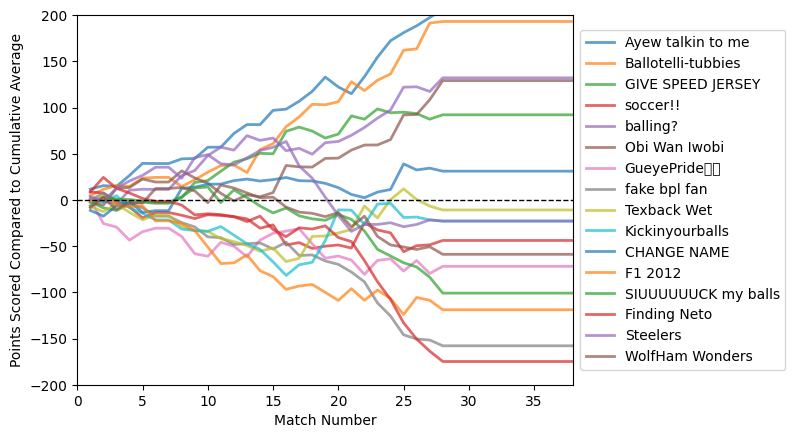

In [9]:
ax = new_df_centered.plot(alpha=0.7, linewidth=2)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_xlim(0, 38)
ax.set_ylim(-200, 200)
ax.axhline(y=0, color='black', linewidth=1, linestyle='--')
ax.set_ylabel('Points Scored Compared to Cumulative Average')
ax.set_xlabel('Match Number')
plt.show()

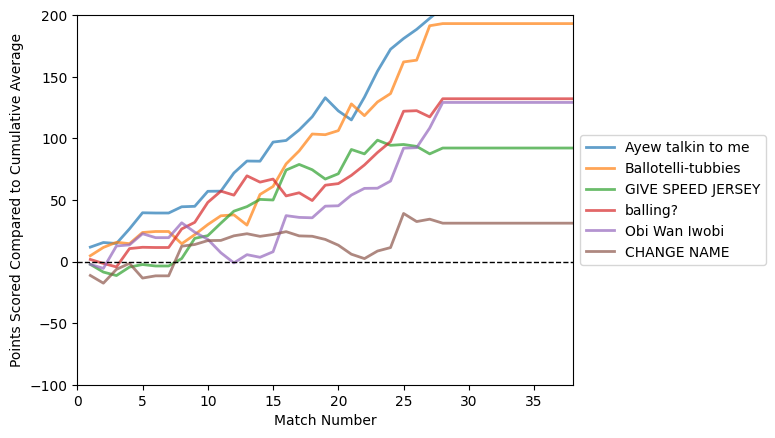

In [10]:
positive_teams = new_df_centered.iloc[-1, :] > 0
positive_df = new_df_centered.loc[:, positive_teams]

ax = positive_df.plot(alpha=0.7, linewidth=2)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_xlim(0, 38)
ax.set_ylim(-100, 200)
ax.axhline(y=0, color='black', linewidth=1, linestyle='--')
ax.set_ylabel('Points Scored Compared to Cumulative Average')
ax.set_xlabel('Match Number')
plt.show()

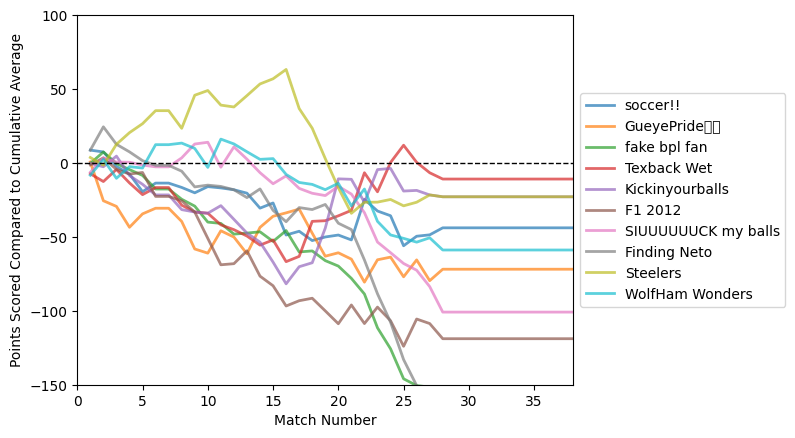

In [11]:
negative_teams = new_df_centered.iloc[-1, :] < 0
negative_df = new_df_centered.loc[:, negative_teams]

ax = negative_df.plot(alpha=0.7, linewidth=2)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_xlim(0, 38)
ax.set_ylim(-150, 100)
ax.axhline(y=0, color='black', linewidth=1, linestyle='--')
ax.set_ylabel('Points Scored Compared to Cumulative Average')
ax.set_xlabel('Match Number')
plt.show()

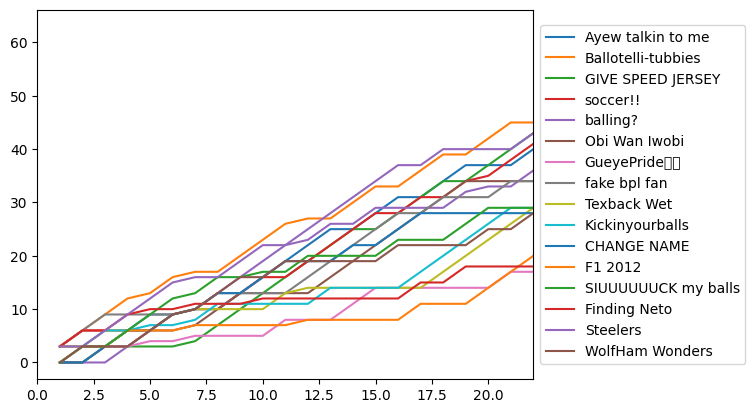

In [12]:
ax = points_df_cumsum.plot()
ax.set_xlim(0, 22)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

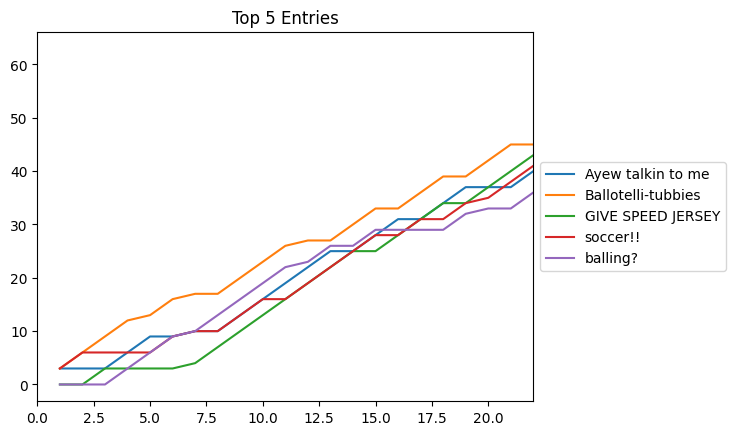

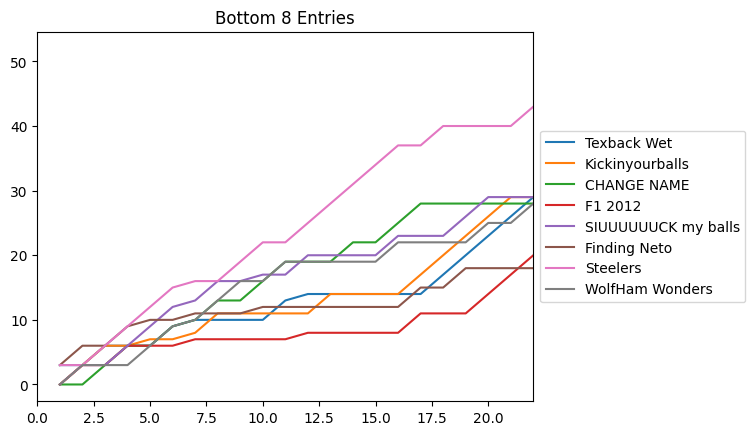

In [13]:
#Extracting the top 8 entries
top_5 = points_df_cumsum.iloc[:, :5]

#Plotting the top 5 entries
ax = top_5.plot()
ax.set_xlim(0, 22)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("Top 5 Entries")
plt.show()

#Extracting the bottom 8 entries
bottom_8 = points_df_cumsum.iloc[:, -8:]

#Plotting the bottom 8 entries
ax = bottom_8.plot()
ax.set_xlim(0, 22)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("Bottom 8 Entries")
plt.show()

In [14]:
import pandas as pd
import numpy as np
import requests

# Make API request and get JSON data
url = 'https://draft.premierleague.com/api/league/83867/details'
response = requests.get(url)
data = response.json()

# Extract league entries and create a mapping of entry IDs to names
league_entries = data['league_entries']
entry_names = {entry['id']: entry['entry_name'] for entry in league_entries}

# Create a dataframe with each team's points difference
standings = data['standings']
team_diffs = {}
for team in standings:
    team_name = entry_names[team['league_entry']]
    points_for = team['points_for']
    points_against = team['points_against']
    diff = points_for - points_against
    team_diffs[team_name] = diff

difference_points_df = pd.DataFrame.from_dict(team_diffs, orient='index', columns=['Point Difference'])
difference_points_df = difference_points_df.sort_values(by='Point Difference', ascending=False)
difference_points_df = difference_points_df.reset_index()
difference_points_df = difference_points_df.rename(columns={"index": "Team", "Point Difference": "Point Difference"})



difference_points_df


,Team,Point Difference
0,Ayew talkin to me,230
1,Ballotelli-tubbies,181
2,Obi Wan Iwobi,165
3,soccer!!,116
4,balling?,86
5,Steelers,64
6,Texback Wet,53
7,GIVE SPEED JERSEY,47
8,CHANGE NAME,20
9,Kickinyourballs,-48


In [15]:
# Sum up the total points for each team
leaderboard = points_df.sum().sort_values(ascending=False)

# Create a data frame from the leaderboard series
leaderboard_df = pd.DataFrame(leaderboard).reset_index()

# Rename the columns of the data frame
leaderboard_df.columns = ['Team', 'Points']

# Print the leaderboard data frame
leaderboard_df



,Team,Points
0,Ballotelli-tubbies,63.0
1,Ayew talkin to me,55.0
2,Obi Wan Iwobi,52.0
3,Steelers,52.0
4,soccer!!,51.0
5,balling?,49.0
6,GIVE SPEED JERSEY,46.0
7,Texback Wet,41.0
8,CHANGE NAME,37.0
9,Kickinyourballs,36.0


In [16]:
# Sum up the total points for each team
total_points = new_df.sum().sort_values(ascending=False)

# Create a data frame from the leaderboard series
total_points_df = pd.DataFrame(total_points).reset_index()

# Rename the columns of the data frame
total_points_df.columns = ['Team', 'Total Points']

# Print the leaderboard daa frame
total_points_df

,Team,Total Points
0,Ayew talkin to me,1106.0
1,Ballotelli-tubbies,1093.0
2,balling?,1032.0
3,Obi Wan Iwobi,1029.0
4,GIVE SPEED JERSEY,992.0
5,CHANGE NAME,931.0
6,Texback Wet,889.0
7,Kickinyourballs,877.0
8,Steelers,877.0
9,soccer!!,856.0


In [17]:
import pandas as pd
import requests

# get the league entries and transactions from the API
res1 = requests.get("https://draft.premierleague.com/api/league/83867/details")
res2 = requests.get("https://draft.premierleague.com/api/draft/league/83867/transactions")

league_details = res1.json()
transactions = res2.json()["transactions"]

# create a dictionary mapping entry IDs to team names
teams = {entry["entry_id"]: entry["entry_name"] for entry in league_details["league_entries"]}

# create an empty DataFrame with the team names as columns and the event numbers as rows
columns = list(teams.values())
index = [x + 1 for x in range(38)]
trades_df = pd.DataFrame(0, columns=columns, index=index)

# loop through the transactions and update the counts for each team
for transaction in transactions:
    event = transaction["event"]
    team_id = transaction["entry"]
    team_name = teams.get(team_id)
    result = transaction["result"]

    if team_name and result == "a":
        trades_df.at[event, team_name] += 1

trades_df

,Ayew talkin to me,Ballotelli-tubbies,GIVE SPEED JERSEY,soccer!!,balling?,Obi Wan Iwobi,GueyePride🇸🇳,fake bpl fan,Texback Wet,Kickinyourballs,CHANGE NAME,F1 2012,SIUUUUUUCK my balls,Finding Neto,Steelers,WolfHam Wonders
1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,1,0,0,0,1,0,0,0,0,1,2,1,0,0,1,1
3,1,0,3,0,1,2,0,0,0,2,0,2,0,0,0,0
4,2,0,1,0,1,1,4,0,0,0,0,1,0,0,0,0
5,3,0,0,0,0,0,5,2,0,3,0,2,0,0,0,0
6,0,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0
7,1,0,0,0,1,2,0,0,0,4,0,0,0,0,1,0
8,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,3,0,1,0,0,0,0,0
10,0,1,0,0,2,0,3,0,0,0,1,0,0,0,0,0


In [18]:


# Sum up the total points for each team
totals = trades_df.sum().sort_values(ascending=False)

# Create a data frame from the leaderboard series
trades_df2 = pd.DataFrame(totals).reset_index()

# Rename the columns of the data frame
trades_df2.columns = ['Team', 'Total Trades']

# Print the leaderboard data frame
trades_df2

,Team,Total Trades
0,Ayew talkin to me,31
1,GIVE SPEED JERSEY,27
2,balling?,22
3,Kickinyourballs,16
4,Obi Wan Iwobi,14
5,GueyePride🇸🇳,13
6,Ballotelli-tubbies,9
7,F1 2012,7
8,Texback Wet,5
9,CHANGE NAME,5


In [19]:
import pandas as pd
import requests

# Get the choices from the API
fixture_list = requests.get("https://draft.premierleague.com/api/draft/83867/choices")

# Create an empty dictionary to store the pick order for each entry_name
pick_order_dict = {}

# Loop through the choices and update the pick order for each entry_name in the first round
for choice in fixture_list.json()['choices']:
    if choice['round'] == 1:
        pick_order_dict[choice['entry_name']] = choice['pick']

# Create a DataFrame from the pick_order_dict
pick_order_df = pd.DataFrame.from_dict(pick_order_dict, orient='index', columns=['Pick'])

# Reset the index to create a column for the entry_name
pick_order_df = pick_order_df.reset_index()

# Rename the columns to 'Entry Name' and 'Pick'
pick_order_df = pick_order_df.rename(columns={'index': 'Team'})

pick_order_df

,Team,Pick
0,Obi Wan Iwobi,1
1,Finding Neto,2
2,GIVE SPEED JERSEY,3
3,CHANGE NAME,4
4,GueyePride🇸🇳,5
5,WolfHam Wonders,6
6,Ballotelli-tubbies,7
7,fake bpl fan,8
8,F1 2012,9
9,SIUUUUUUCK my balls,10


In [20]:
# Merge total_points_df with leaderboard_df on 'Team' column
merged_df = total_points_df.merge(leaderboard_df, on='Team')

# Merge trades_df2 with the above merged dataframe on 'Team' column
merged_df = merged_df.merge(trades_df2, on='Team')
merged_df = merged_df.merge(difference_points_df, on='Team')

final_df = merged_df.sort_values('Points', ascending=False)
points_df_cumsum = points_df.cumsum()

last_valid_index = points_df_cumsum.apply(pd.Series.last_valid_index)
last_valid_column = last_valid_index.idxmax()
current_gw = last_valid_index[last_valid_column] 
final_df['Avg Gameweek Points'] = final_df['Total Points'] / current_gw
final_df['Avg Gameweek Points'] = final_df['Avg Gameweek Points'].round(1)

# Extract the 'Points' column and store it in a variable
points = final_df.pop('Points')

# Insert the 'Points' column before the 'Total Points' column
final_df.insert(final_df.columns.get_loc('Total Points'), 'Points', points)
final_df = final_df.set_index(pd.Index(np.arange(1, len(final_df)+1)))

FINALFINAL_DF = pd.merge(pick_order_df, final_df, on='Team')
FINALFINAL_DF = FINALFINAL_DF.sort_values(by='Points', ascending=False)
FINALFINAL_DF = FINALFINAL_DF.reset_index().drop('index', axis=1)

FINALFINAL_DF

,Team,Pick,Points,Total Points,Total Trades,Point Difference,Avg Gameweek Points
0,Ballotelli-tubbies,7,63.0,1093.0,9,181,39.0
1,Ayew talkin to me,11,55.0,1106.0,31,230,39.5
2,Obi Wan Iwobi,1,52.0,1029.0,14,165,36.8
3,Steelers,14,52.0,877.0,2,64,31.3
4,soccer!!,13,51.0,856.0,0,116,30.6
5,balling?,15,49.0,1032.0,22,86,36.9
6,GIVE SPEED JERSEY,3,46.0,992.0,27,47,35.4
7,Texback Wet,16,41.0,889.0,5,53,31.8
8,CHANGE NAME,4,37.0,931.0,5,20,33.2
9,Kickinyourballs,12,36.0,877.0,16,-48,31.3


In [21]:
FINALFINAL_DF.to_csv('MYLEAGUE.csv', index=False)
